# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [2]:
#TODO

diabetesData = None
import pandas as pd

diabetesData = pd.read_csv("DiabetesTrain.csv") #Dataset Loading

print(diabetesData.head()) 


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       95             74             21       73  25.9   
1            1       95             82             25      180  35.0   
2            1       90             68              8        0  24.5   
3            7      195             70             33      145  25.1   
4            0      180             66             39        0  42.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.673   36        0  
1                     0.233   43        1  
2                     1.138   36        0  
3                     0.163   55        1  
4                     1.893   25        1  


**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [3]:
#TODO

#P(A)
P_A = None

#P(B)
P_B = None

#P(C)
P_C = None

#P(D)
P_D = None

#P(A, D)
P_A_D = None

#P(B, D)
P_B_D = None

#P(C, D)
P_C_D = None

#Indicate which one out of A, B, C contributes the most towards high risk of diabetes.
#Assign one of 'A', 'B', 'C' to the following variable Q2, indicating your answer.
#Hint: Compute the necessary conditional probabilities and then compare.

# Define events as boolean masks
A = diabetesData["BMI"] < 25
B = diabetesData["Glucose"] > 100
C = diabetesData["Pregnancies"] > 2
D = diabetesData["Outcome"] == 1  # High risk of diabetes

# Total number of patients
total_patients = len(diabetesData)

# P(A) - Probability of A
P_A = A.sum() / total_patients

# P(B) - Probability of B
P_B = B.sum() / total_patients

# P(C) - Probability of C
P_C = C.sum() / total_patients

# P(D) - Probability of high risk of diabetes
P_D = D.sum() / total_patients

# Joint probabilities
P_A_D = (A & D).sum() / total_patients  # P(A and D)
P_B_D = (B & D).sum() / total_patients  # P(B and D)
P_C_D = (C & D).sum() / total_patients  # P(C and D)

# Conditional probabilities P(D | A), P(D | B), P(D | C)
P_D_given_A = P_A_D / P_A if P_A != 0 else 0
P_D_given_B = P_B_D / P_B if P_B != 0 else 0
P_D_given_C = P_C_D / P_C if P_C != 0 else 0

# Determine which factor contributes the most
if P_D_given_A > P_D_given_B and P_D_given_A > P_D_given_C:
    Q2 = 'A'
elif P_D_given_B > P_D_given_A and P_D_given_B > P_D_given_C:
    Q2 = 'B'
else:
    Q2 = 'C'

# Print results
print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(C) = {P_C:.4f}")
print(f"P(D) = {P_D:.4f}")
print(f"P(A, D) = {P_A_D:.4f}")
print(f"P(B, D) = {P_B_D:.4f}")
print(f"P(C, D) = {P_C_D:.4f}")
print(f"P(D | A) = {P_D_given_A:.4f}")
print(f"P(D | B) = {P_D_given_B:.4f}")
print(f"P(D | C) = {P_D_given_C:.4f}")
print(f"The factor that contributes the most to high risk of diabetes is: {Q2}")

P(A) = 0.1479
P(B) = 0.7368
P(C) = 0.5388
P(D) = 0.3784
P(A, D) = 0.0075
P(B, D) = 0.3559
P(C, D) = 0.2531
P(D | A) = 0.0508
P(D | B) = 0.4830
P(D | C) = 0.4698
The factor that contributes the most to high risk of diabetes is: B


**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [4]:
#TODO

diabetesX = None

# Convert dataframe to 2D numpy array
diabetesX = diabetesData.to_numpy()

# Display shape to verify
print("Shape of diabetesX:", diabetesX.shape)

Shape of diabetesX: (399, 9)


**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [5]:
#TODO
# Compute column-wise mean
column_means = diabetesX.mean(axis=0)

# Subtract column means from each element in the column
diabetesX = diabetesX - column_means

# Display the first few rows to verify
print(diabetesX[:5])



[[ -2.84711779 -26.95989975   5.1754386    0.15037594 -11.12280702
   -6.24360902   0.1785188    3.07017544  -0.37844612]
 [ -2.84711779 -26.95989975  13.1754386    4.15037594  95.87719298
    2.85639098  -0.2614812   10.07017544   0.62155388]
 [ -2.84711779 -31.95989975  -0.8245614  -12.84962406 -84.12280702
   -7.64360902   0.6435188    3.07017544  -0.37844612]
 [  3.15288221  73.04010025   1.1754386   12.15037594  60.87719298
   -7.04360902  -0.3314812   22.07017544   0.62155388]
 [ -3.84711779  58.04010025  -2.8245614   18.15037594 -84.12280702
    9.85639098   1.3985188   -7.92982456   0.62155388]]


**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [6]:
#TODO
n = diabetesX.shape[0]

# Compute the covariance matrix using matrix operations
cov = (diabetesX.T @ diabetesX) / (n - 1)

# Print the covariance matrix
print("Covariance matrix:\n", cov)

Covariance matrix:
 [[ 1.18735532e+01  2.33682258e+01  7.79471921e+00 -1.81952998e+00
  -1.62424844e+01  2.09211093e+00 -9.71825292e-02  2.10043198e+01
   4.07249279e-01]
 [ 2.33682258e+01  1.04683758e+03  4.82467160e+01  1.21447085e+01
   1.38017328e+03  5.94032607e+01  1.29241130e+00  1.20067531e+02
   7.14586718e+00]
 [ 7.79471921e+00  4.82467160e+01  3.77446531e+02  6.41318434e+01
   2.19169840e+02  3.36335493e+01 -1.68822401e-01  3.79826325e+01
   2.42440272e-01]
 [-1.81952998e+00  1.21447085e+01  6.41318434e+01  2.46339139e+02
   8.49830071e+02  4.79656195e+01  8.24245910e-01 -1.91487702e+01
   4.96750671e-01]
 [-1.62424844e+01  1.38017328e+03  2.19169840e+02  8.49830071e+02
   1.51876708e+04  1.87504933e+02  6.22014427e+00  4.35237151e+01
   8.45843251e+00]
 [ 2.09211093e+00  5.94032607e+01  3.36335493e+01  4.79656195e+01
   1.87504933e+02  6.81425658e+01  3.35088259e-01  5.72869611e+00
   1.24023879e+00]
 [-9.71825292e-02  1.29241130e+00 -1.68822401e-01  8.24245910e-01
   6.220

**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [9]:
#TODO
variances = np.diag(cov)

# Create a column matrix of variances
variance_column = variances.reshape(-1, 1)

# Compute the variance matrix by multiplying the column matrix with its transpose
varmat = variance_column @ variance_column.T

# Print the variance matrix
print("Variance matrix:\n", varmat)

Variance matrix:
 [[1.40981266e+02 1.24296818e+04 4.48163148e+03 2.92492088e+03
  1.80331618e+05 8.09094383e+02 1.40254825e+00 1.54988757e+03
  2.79996991e+00]
 [1.24296818e+04 1.09586893e+06 3.95125214e+05 2.57877069e+05
  1.58990246e+07 7.13341990e+04 1.23656347e+02 1.36646590e+05
  2.46860706e+02]
 [4.48163148e+03 3.95125214e+05 1.42465884e+05 9.29798536e+04
  5.73253366e+06 2.57201751e+04 4.45853874e+01 4.92691342e+04
  8.90078065e+01]
 [2.92492088e+03 2.57877069e+05 9.29798536e+04 6.06829716e+04
  3.74131776e+06 1.67861810e+04 2.90984949e+01 3.21553256e+04
  5.80906291e+01]
 [1.80331618e+05 1.58990246e+07 5.73253366e+06 3.74131776e+06
  2.30665345e+08 1.03492686e+06 1.79402414e+03 1.98248846e+06
  3.58149077e+03]
 [8.09094383e+02 7.13341990e+04 2.57201751e+04 1.67861810e+04
  1.03492686e+06 4.64340928e+03 8.04925320e+00 8.89483661e+03
  1.60690848e+01]
 [1.40254825e+00 1.23656347e+02 4.45853874e+01 2.90984949e+01
  1.79402414e+03 8.04925320e+00 1.39532127e-02 1.54190139e+01
  2.78

**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

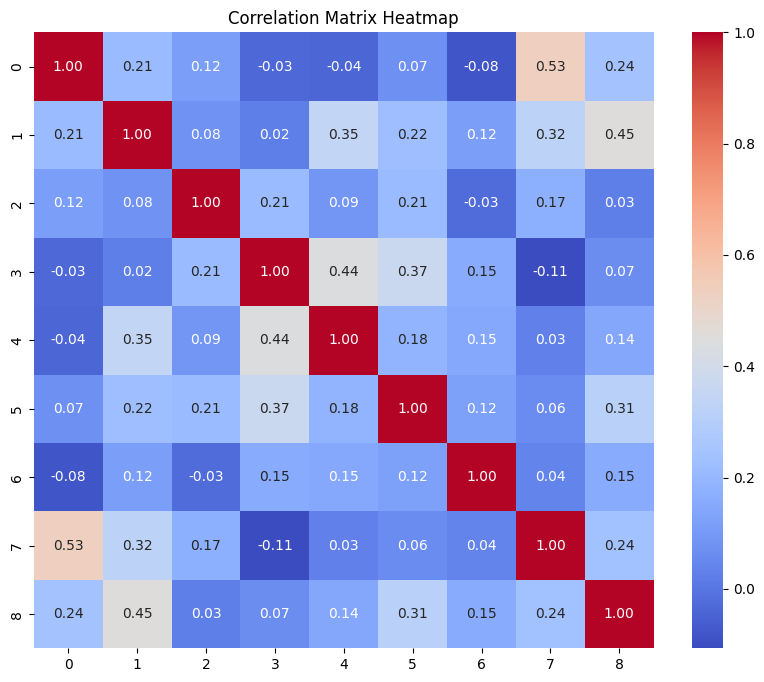

In [10]:
#TODO

# Compute the correlation matrix
corr = cov / np.sqrt(varmat)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

From the heatmap read the following correlations. Also, answer the question below.

In [11]:
#Corr(BMI, Outcome)
Corr1 = 0.31

#Corr(Glucose, Outcome)
Corr2 = 0.45

#Corr(Pregnancies, Outcome)
Corr3 = 0.24

#Out of the 8 features, which two features are the most correlated. Fill in the list variable bestcorr
bestcorr = ['Pregnancies', 'Age']

## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [85]:
def normalizeData(X, mean=None, std=None):
    if mean is None or std is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    
    normalized_X = (X - mean) / std
    
    return normalized_X, mean, std

**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [86]:
def sigmoid(t):
    sig = 1 / (1 + np.exp(-t))
    
    return sig

In [87]:
def derivSigmoid(p):
    sig_p = sigmoid(p)
    
    deriv_p = sig_p * (1 - sig_p)
    
    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [88]:
def sigProg(X, w, b):
   
    z = np.dot(X, w) + b
    p = sigmoid(z)
    return p


**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [89]:
def gradient(X, y, w, b, reg="none", Lambda=0.1):
    p = sigProg(X, w, b)
    
    error = p - y
    
    p_prime = derivSigmoid(p)
    
    grad_w = (1 / len(X)) * np.dot(X.T, error * p_prime)
    
    # Add regularization term
    if reg == "ridge":
        grad_w += Lambda * w  # Ridge regularization (L2)
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w)  # Lasso regularization (L1)
    
    
    grad_b = (1 / len(X)) * np.sum(error * p_prime)
    
    return grad_w, grad_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [90]:
def grad_descent(grad_w, deriv_b, w, b, eta=0.01):
    # Update the weights using the gradient descent rule
    w = w - eta * grad_w
    
    # Update the bias using the gradient descent rule
    b = b - eta * deriv_b
    
    return w, b

**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [91]:
def train(X, y, reg='none', Lambda=0.1, eta=0.01, max_iter=1000):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])  # initialize weights to zeros or you can use random initialization
    b = 0  # initialize bias to 0
    
    # Training loop for max_iter iterations
    for i in range(max_iter):
        # Compute predicted probabilities
        p = sigProg(X, w, b)
        
        # Compute the gradient of the loss function with respect to w and b
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        
        # Update weights and bias using gradient descent
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
        
    return w, b 

**Q10.** Predict using the model

Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [92]:
def predict(X, w, b):
    # Compute the linear combination: X * w + b
    z = np.dot(X, w) + b
    
    # Apply the sigmoid function to compute probabilities
    p = sigmoid(z)
    
    # Convert probabilities to binary predictions (1 if p >= 0.5, else 0)
    yhat = (p >= 0.5).astype(int)
    
    return yhat

**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

In [93]:
diabetes_data = pd.read_csv('DiabetesTrain.csv')  

X_train = diabetes_data.drop(columns=['Outcome']).values
y_train = diabetes_data['Outcome'].values

X_train, mean, std = normalizeData(X_train)


In [94]:
from sklearn.model_selection import KFold

def cross_validate(X, y, eta_values, lambda_values, reg_types, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    best_eta, best_lambda, best_reg, best_accuracy = None, None, None, 0
    
    for eta in eta_values:
        for Lambda in lambda_values:
            for reg in reg_types:
                accuracies = []
                
                # Perform k-fold cross-validation
                for train_idx, val_idx in kf.split(X):
                    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
                    y_train_cv, y_val_cv = y[train_idx], y[val_idx]
                    
                    # Train the model
                    w, b = train(X_train_cv, y_train_cv, reg=reg, Lambda=Lambda, eta=eta)
                    
                    # Make predictions on the validation set
                    y_pred = predict(X_val_cv, w, b)
                    
                    # Calculate classification accuracy
                    accuracy = np.mean(y_pred == y_val_cv)
                    accuracies.append(accuracy)
                
                # Update best parameters if current combination yields higher accuracy
                avg_accuracy = np.mean(accuracies)
                if avg_accuracy > best_accuracy:
                    best_eta, best_lambda, best_reg, best_accuracy = eta, Lambda, reg, avg_accuracy
                    
    return best_eta, best_lambda, best_reg, best_accuracy

# Define hyperparameter ranges for cross-validation
eta_values = [0.01, 0.05, 0.1, 0.5]
lambda_values = [0.1, 0.5, 1.0]
reg_types = ['none', 'ridge', 'lasso']

# Perform cross-validation
best_eta, best_lambda, best_reg, best_accuracy = cross_validate(X_train, y_train, eta_values, lambda_values, reg_types)
print(f"Best parameters: eta={best_eta}, Lambda={best_lambda}, reg={best_reg}, accuracy={best_accuracy}")


Best parameters: eta=0.5, Lambda=0.1, reg=none, accuracy=0.7468987341772151


In [95]:

w, b = train(X_train, y_train, reg=best_reg, Lambda=best_lambda, eta=best_eta)


In [96]:

y_pred_train = predict(X_train, w, b)

classification_error = np.mean(y_pred_train != y_train)
print(f"Classification Error on Training Set: {classification_error:.4f}")


Classification Error on Training Set: 0.2431


In [97]:
w

array([ 0.39479242,  1.03746532, -0.14826265, -0.01609689, -0.10658051,
        0.72110443,  0.34081773,  0.09257759])

In [98]:
b

-0.6962665344446711

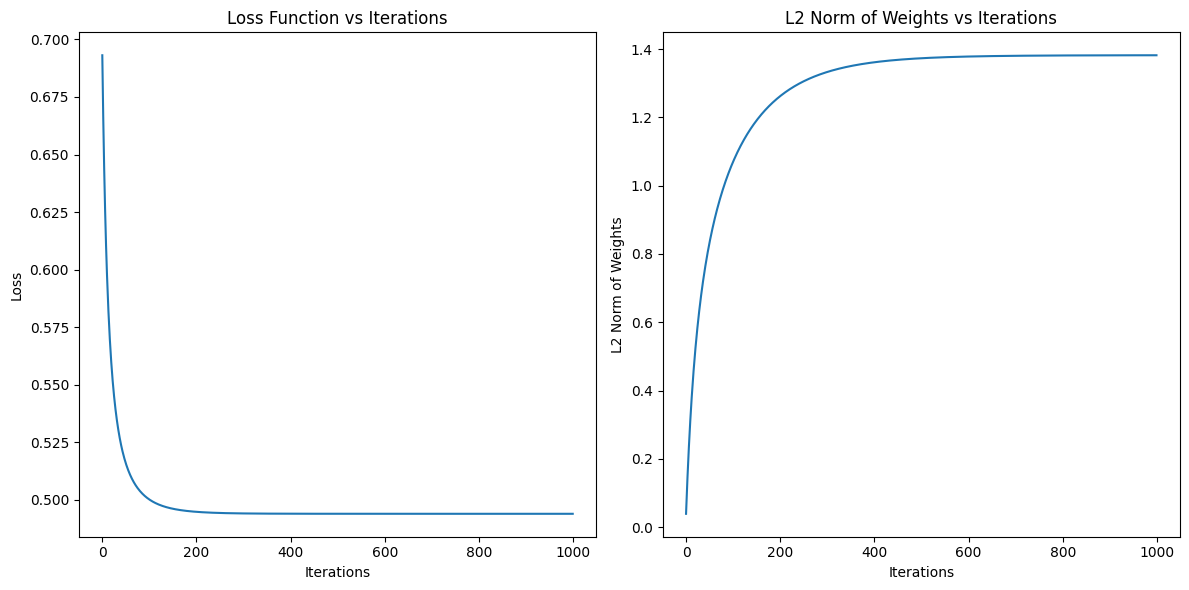

In [99]:
def train(X, y, reg='none', Lambda=0.1, eta=0.01, max_iter=1000):
    w = np.zeros(X.shape[1]) 
    b = 0  
    loss_values = []  
    omega_norm_values = []  
    
    for i in range(max_iter):
        p = sigProg(X, w, b)
        
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
        
        loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        loss_values.append(loss)
        
        
        omega_norm_values.append(np.linalg.norm(w))
    
    return w, b, loss_values, omega_norm_values

w, b, loss_values, omega_norm_values = train(X_train, y_train, reg=best_reg, Lambda=best_lambda, eta=best_eta)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_values)
plt.title("Loss Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(omega_norm_values)
plt.title("L2 Norm of Weights vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("L2 Norm of Weights")

plt.tight_layout()
plt.show()


In [100]:
w

array([ 0.39479242,  1.03746532, -0.14826265, -0.01609689, -0.10658051,
        0.72110443,  0.34081773,  0.09257759])

In [101]:
b

-0.6962665344446711

In [102]:
mean

array([  3.84711779, 121.95989975,  68.8245614 ,  20.84962406,
        84.12280702,  32.14360902,   0.4944812 ,  32.92982456])

In [103]:
std

array([  3.44148151,  32.31429917,  19.40362207,  15.67551428,
       123.08373764,   8.24450013,   0.34326035,  11.41076692])

**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [104]:

# Load the test dataset
diabetes_test = pd.read_csv('DiabetesTest.csv')  # Replace with actual file path

X_test = diabetes_test.values  

X_test_normalized = (X_test - mean) / std  

y_test_pred = predict(X_test_normalized, w, b)

print("Predictions on Test Data:")
print(y_test_pred)

Predictions on Test Data:
[0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
